# TMDB Movie Analysis Pipeline

In [ ]:
# Set up the Python environment to include the current directory in the module search path
import sys
sys.path.insert(0, '.')

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Environment ready


## Step 1: Extract - Fetch Movies from TMDB API

In [ ]:
from src.extract.fetch_movies import fetch_movies, MOVIE_IDS
raw_df = fetch_movies(MOVIE_IDS)

print(f"Fetched {len(raw_df)} movies")
raw_df[['id', 'title', 'release_date']].head()

2026-01-27 10:21:45 | extract | INFO | Starting extraction for 19 movies...
2026-01-27 10:21:45 | extract | INFO | Fetching movie ID: 0
2026-01-27 10:21:45 | extract | INFO | Attempt 1 of 3 for movie ID 0
2026-01-27 10:21:49 | extract | WARNING | Attempt 1 failed for movie ID 0: 404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/0?api_key=d703444a0cdc339616bf4ed9c0609a3b
2026-01-27 10:21:49 | extract | INFO | Retrying in 1.0 seconds...
2026-01-27 10:21:50 | extract | INFO | Attempt 2 of 3 for movie ID 0
2026-01-27 10:21:52 | extract | WARNING | Attempt 2 failed for movie ID 0: 404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/0?api_key=d703444a0cdc339616bf4ed9c0609a3b
2026-01-27 10:21:52 | extract | INFO | Retrying in 2.0 seconds...
2026-01-27 10:21:54 | extract | INFO | Attempt 3 of 3 for movie ID 0
2026-01-27 10:21:57 | extract | WARNING | Attempt 3 failed for movie ID 0: 404 Client Error: Not Found for url: https://api.themoviedb.org/3/movi

Fetched 18 movies


,id,title,release_date
0,299534,Avengers: Endgame,2019-04-24
1,19995,Avatar,2009-12-16
2,140607,Star Wars: The Force Awakens,2015-12-15
3,299536,Avengers: Infinity War,2018-04-25
4,597,Titanic,1997-12-18


## Step 2: Transform - Clean Data

In [4]:
from src.transform.clean_movies import clean_movies

cleaned_df = clean_movies(raw_df)

print(f"Cleaned data: {len(cleaned_df)} movies")
cleaned_df[['title', 'genres', 'budget_musd', 'revenue_musd']].head()

2026-01-27 10:23:46 | transform | INFO | Starting data cleaning. Input: 18 rows, 30 columns
2026-01-27 10:23:46 | transform | INFO | Step 1: Dropping irrelevant columns...
2026-01-27 10:23:46 | transform | INFO |   Dropped 5 columns: ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
2026-01-27 10:23:46 | transform | INFO | Step 2: Parsing JSON-like columns...
2026-01-27 10:23:46 | transform | INFO |   Parsed belongs_to_collection
2026-01-27 10:23:46 | transform | INFO |   Parsed genres
2026-01-27 10:23:46 | transform | INFO |   Parsed spoken_languages
2026-01-27 10:23:46 | transform | INFO |   Parsed production_countries
2026-01-27 10:23:46 | transform | INFO |   Parsed production_companies
2026-01-27 10:23:46 | transform | INFO | Step 3: Converting data types...
2026-01-27 10:23:46 | transform | INFO |   Converted 7 columns to numeric
2026-01-27 10:23:46 | transform | INFO |   Converted release_date to datetime
2026-01-27 10:23:46 | transform | INFO | Step 4: Handling missin

Cleaned data: 18 movies


,title,genres,budget_musd,revenue_musd
0,Avengers: Endgame,Adventure|Science Fiction|Action,356.0,2799.439100
1,Avatar,Action|Adventure|Fantasy|Science Fiction,237.0,2923.706026
2,Star Wars: The Force Awakens,Adventure|Action|Science Fiction,245.0,2068.223624
3,Avengers: Infinity War,Adventure|Action|Science Fiction,300.0,2052.415039
4,Titanic,Drama|Romance,200.0,2264.162353


## Step 3: Transform - Enrich Data

In [5]:
from src.transform.enrich_movies import enrich_movies

enriched_df = enrich_movies(cleaned_df)

print("Enriched data with profit and ROI")
enriched_df[['title', 'profit_musd', 'roi', 'release_year']].head()

2026-01-27 10:23:51 | transform | INFO | Starting data enrichment. Input: 18 rows
2026-01-27 10:23:51 | transform | INFO |   Calculated profit for 18 movies
2026-01-27 10:23:51 | transform | INFO |   Calculated ROI for 18 movies
2026-01-27 10:23:51 | transform | INFO |   Extracted release_year and release_month
2026-01-27 10:23:51 | transform | INFO |   Created runtime_category column
2026-01-27 10:23:51 | transform | INFO |   Created is_franchise flag
2026-01-27 10:23:51 | transform | INFO |   Created vote_score (weighted rating) column
2026-01-27 10:23:51 | transform | INFO | Enrichment complete. Output: 18 rows, 33 columns


Enriched data with profit and ROI


,title,profit_musd,roi,release_year
0,Avengers: Endgame,2443.439100,6.863593,2019
1,Avatar,2686.706026,11.336312,2009
2,Star Wars: The Force Awakens,1823.223624,7.441729,2015
3,Avengers: Infinity War,1752.415039,5.841383,2018
4,Titanic,2064.162353,10.320812,1997


## Step 4: Analysis - Best and Worst Performers

In [7]:
from src.analysis.kpi_rankings import get_highest_revenue, get_highest_roi

print("Top 5 Movies by Revenue:")
display(get_highest_revenue(enriched_df, n=5)[['title', 'revenue_musd']])

print("\nTop 5 Movies by ROI:")
display(get_highest_roi(enriched_df, n=5)[['title', 'roi']])

Top 5 Movies by Revenue:


,title,revenue_musd
0,Avatar,2923.706026
1,Avengers: Endgame,2799.439100
2,Titanic,2264.162353
3,Star Wars: The Force Awakens,2068.223624
4,Avengers: Infinity War,2052.415039



Top 5 Movies by ROI:


,title,roi
0,Avatar,11.336312
1,Titanic,10.320812
2,Jurassic World,10.143583
3,Harry Potter and the Deathly Hallows: Part 2,9.732090
4,Frozen II,8.691223


## Step 5: Analysis - Franchise vs Standalone

In [8]:
from src.analysis.franchise_analysis import compare_franchise_vs_standalone

comparison = compare_franchise_vs_standalone(enriched_df)

print("Franchise vs Standalone Comparison:")
display(comparison)

2026-01-27 10:26:38 | analysis | INFO | Comparing franchise vs standalone movies...
2026-01-27 10:26:38 | analysis | INFO |   Franchise movies: 16
2026-01-27 10:26:38 | analysis | INFO |   Standalone movies: 2
2026-01-27 10:26:39 | analysis | INFO | Franchise vs standalone comparison complete


Franchise vs Standalone Comparison:


,Franchise,Standalone
Mean Revenue ($M),1682.67,1765.14
Median ROI,6.79,8.62
Mean Budget ($M),218.00,180.00
Mean Popularity,21.49,24.89
Mean Rating,7.39,7.43
Movie Count,16.00,2.00


## Step 6: Visualization

In [9]:
from src.visualization.plots import create_all_visualizations
import matplotlib.pyplot as plt

viz_paths = create_all_visualizations(enriched_df, output_dir='data/analytics/plots')

print(f"Created {len(viz_paths)} visualizations")
for name, path in viz_paths.items():
    print(f"  - {name}: {path}")

2026-01-27 10:26:44 | visualization | INFO | Creating all visualizations in data/analytics/plots...
2026-01-27 10:26:44 | visualization | INFO | Creating Revenue vs Budget plot...
2026-01-27 10:26:45 | visualization | INFO |   Saved to: data/analytics/plots\revenue_vs_budget.png
2026-01-27 10:26:45 | visualization | INFO | Creating ROI by Genre plot...
2026-01-27 10:26:45 | visualization | INFO |   Saved to: data/analytics/plots\roi_by_genre.png
2026-01-27 10:26:45 | visualization | INFO | Creating Popularity vs Rating plot...
2026-01-27 10:26:45 | visualization | INFO |   Saved to: data/analytics/plots\popularity_vs_rating.png
2026-01-27 10:26:45 | visualization | INFO | Creating Yearly Trends plot...
2026-01-27 10:26:45 | visualization | INFO |   Saved to: data/analytics/plots\yearly_trends.png
2026-01-27 10:26:45 | visualization | INFO | Creating Franchise Comparison plot...
2026-01-27 10:26:46 | visualization | INFO |   Saved to: data/analytics/plots\franchise_comparison.png
2026-0

Created 5 visualizations
  - revenue_vs_budget: data/analytics/plots\revenue_vs_budget.png
  - roi_by_genre: data/analytics/plots\roi_by_genre.png
  - popularity_vs_rating: data/analytics/plots\popularity_vs_rating.png
  - yearly_trends: data/analytics/plots\yearly_trends.png
  - franchise_comparison: data/analytics/plots\franchise_comparison.png


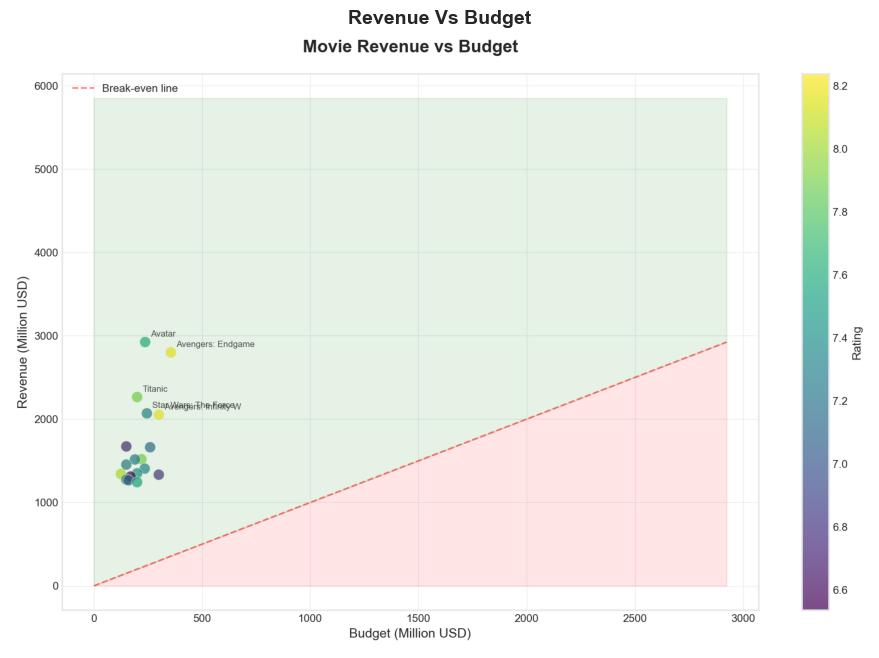

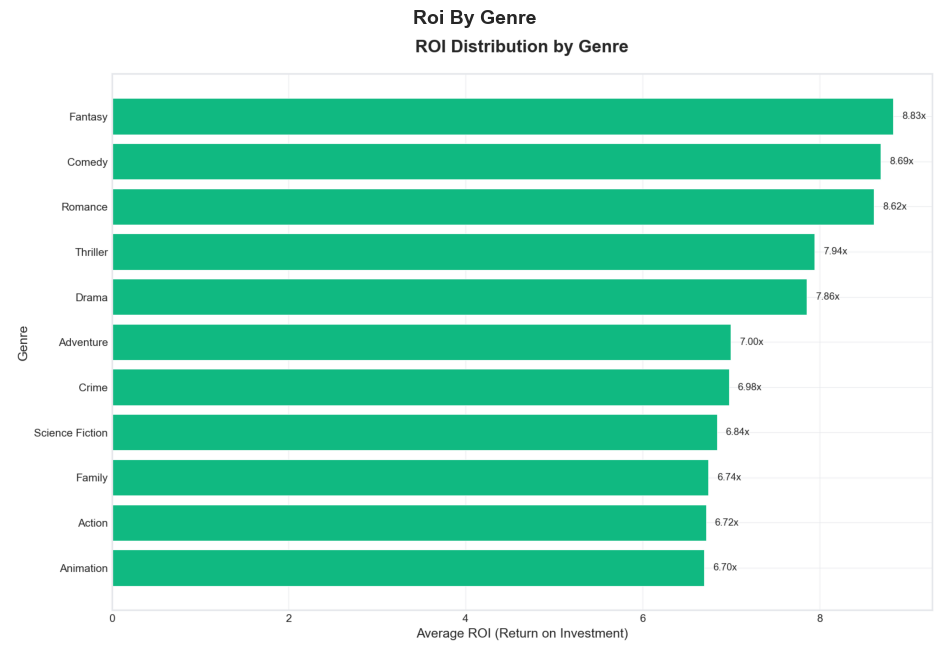

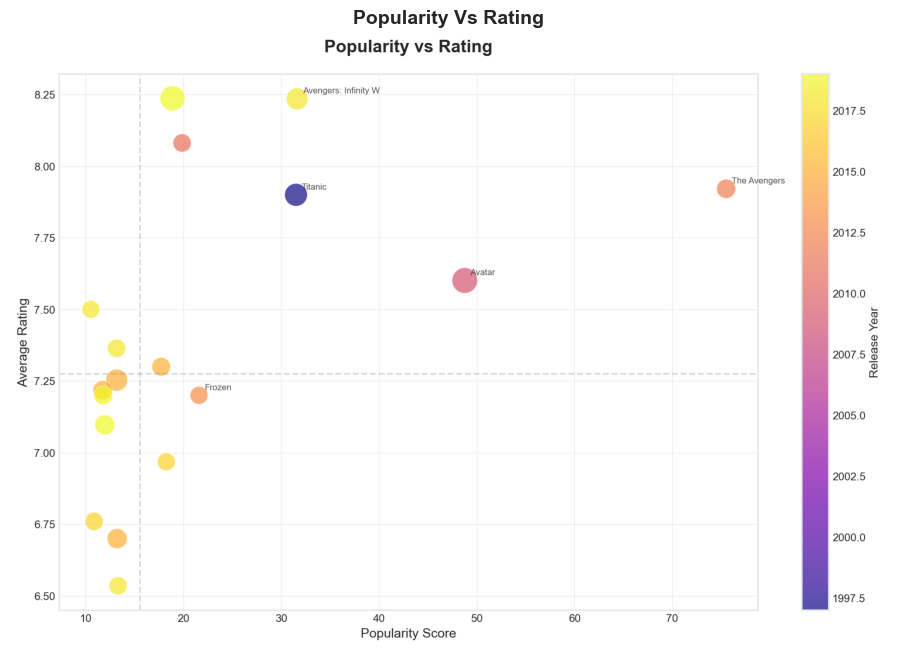

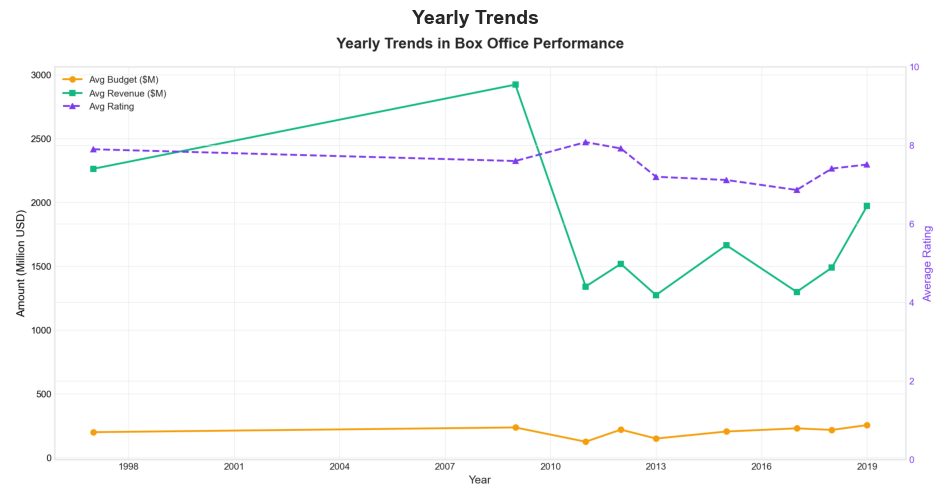

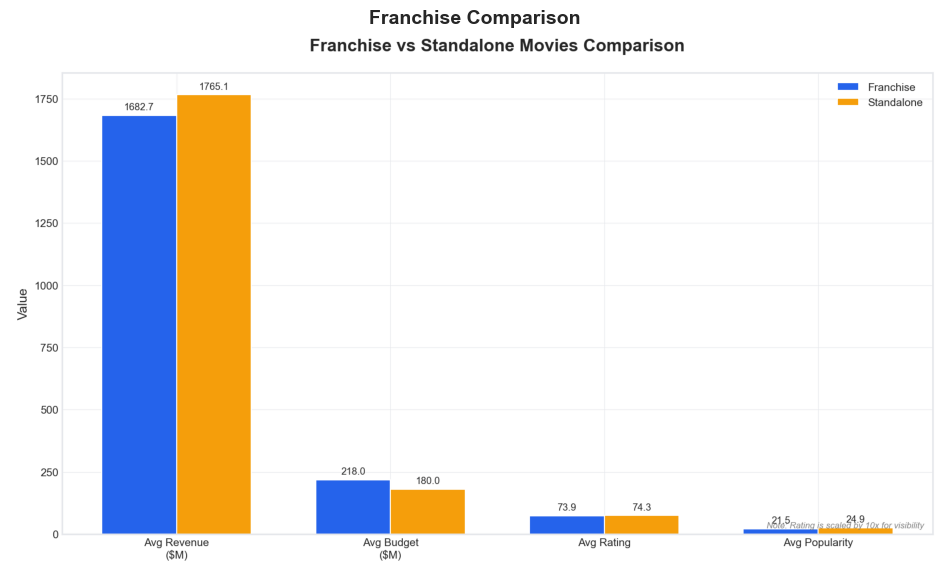

In [11]:
# Display all visualizations
from PIL import Image
import matplotlib.pyplot as plt

for name, path in viz_paths.items():
    img = Image.open(path)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(name.replace('_', ' ').title())
    plt.show()